### TODOS:
1. Clean up: 
* duplicates and unprocessed
2. Visualisation and stats by group.


In [1]:
print('imports and options')
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# pd.set_option('display.max_colwidth',20) #change this to increse width cutoff limit
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

plt.rcParams['figure.figsize'] = [20, 10]

# plt.rcParams['axes.facecolor'] = 'black'
# pd.set_option('display.max_rows', df.shape[0]+1)

imports and options


In [2]:
print('Load file')
by_good = pd.read_excel('by_name.xls',skiprows=list(range(8)),header = 0,na_values=[' ']).fillna(0)
by_good = by_good.drop(columns = ['Unnamed: 1','Unnamed: 2'])
by_good = by_good.rename(columns={'Unnamed: 0':'name','единица':'amt',
                                  'Сумма':'in','Сумма.1':'Out','Процент':'Prof %','Сумма.2':'Profit'})

print('Cleaning')
drop = [0,3261] 
# # Profit <=0: 
drop += [769, 1082, 113, 332, 333, 1531, 2133, 2401, 799, 1804, 1519, 778, 1338, 2391, 1518, 1568, 2567, 707, 787, 385, 1344, 2665,
         454, 2717, 2755, 2543, 3236, 85, 2561, 132, 2803, 3254, 1828, 97, 337, 1609, 2552, 2500, 3211, 1984, 84, 1968, 2790, 875, 
         1021, 2489, 1469, 1900, 2437, 2503, 2856, 2431, 2537, 2737, 2950, 2928, 1118, 2559, 719, 33, 2930, 2929, 2323, 26, 2013, 
         1965, 1812, 54, 68, 2859, 3227, 1450, 80, 703, 602, 1253, 1437, 771, 2353, 53, 1898, 3248, 2130, 953, 768, 1705, 143, 1934, 
         1292, 206, 1107, 877, 293, 1037, 977]
# Unrealistic profit value:
drop+= [3170, 821, 90, 730, 1682, 1538, 1539, 1541, 2122, 62, 2299, 694, 819, 4, 1, 2,1485]

by_good.loc[sorted(drop),:]

df = by_good.drop(drop)
df = df.drop(columns = ['in','Out'])
df = df.reset_index(drop=True)

print('Save a copy')
clean_df = df.copy()

Load file
Cleaning
Save a copy


In [3]:
print('load clean DF')
df = clean_df

print('Combine features')
df['PPU'] = np.round(df['Profit']/df['amt'],2) # profit per unit

print('RB system for market group assignment')
df['name'] = df['name'].str.lower()

kwd_by_cat = {
    
    'B&W'        :['аксель+', 'ароматизат', 'вымп', 'галст', 'гв. вдв', 'жет+', 'за отл. в сл.', 'зажим', 'звезда', 'кл-ть', 'клямер', 'кокарда', 'кольцо', 'курсовка', 'липуч', 'лычки', 'мет. выстрел', 'нагр+', 'накл', 'наклейка', 'наш+', 'нашивка', 'обложка', 'орел', 'платочек', 'погоны', 'пуговица', 'свисток', 'сувенир', 'удост+', 'фальшп+', 'филигран', 'флаг', 'шевврон', 'шеврон', 'эмб+', 'якорь'], 
    'Clothes'    :['белье', 'бр', 'брюки', 'ввз', 'ветр', 'вкбо', 'ворот', 'дж+', 'ж-т', 'жил+', 'к-ка', 'к-м', 'к-т', 'кальсоны', 'комплект', 'кост+', 'курт+', 'куртка', 'м/халат', 'майка', 'п/комб.', 'плащ', 'полукомбинезон', 'пончо', 'пухов', 'руб', 'свитер', 'т/б', 'тельн', 'термобелье', 'толст', 'тр. ', 'трусы', 'футб', 'шорты'], 
    'Boots'      :['бот', 'ботинки', 'гамаши', 'крос+', 'п/б', 'сап+', 'стельки', 'туфли'], 
    'Accessories':['арафатка', 'балакл+', 'банд+', 'бейсб', 'бер', 'берет', 'варежки', 'капюшон', 'кепи', 'косынка', 'кошелёк', 'маска', 'накомарнок', 'носки', 'панама', 'перч+', 'пилотка', 'подтяжки', 'подшл', 'полуперч+', 'шап+', 'шапка', 'шарф'], 
    'Gear'       :['uniclean', 'авт. ист.', 'апт+', 'асидол', 'блокн+', 'блюдо', 'гермомешок', 'держатель', 'жезл', 'кейс', 'кобура', 'коврик', 'комп.', 'компас', 'котелок', 'кошелек', 'кружка', 'курвиметр', 'лента', 'лоп+', 'мешок', 'миска', 'наб. ', 'набор', 'накол', 'налокот', 'насадка', 'несессер', 'нессесер', 'огниво', 'очки', 'палатка', 'палки', 'палочка', 'перев', 'пила', 'планшет', 'подсум', 'полот+', 'пряж+', 'пряжка', 'ранец', 'рем', 'рюкз+', 'сеть', 'сиденье', 'сист', 'сп. меш.', 'станок', 'сумка', 'сухпаек', 'термокружка', 'термомиска', 'термоодеяло', 'термос', 'флажки', 'фляга', 'фонар+', 'хозпакет', 'чайник', 'чапельник', 'чехол', 'шнур+']

}

for key in kwd_by_cat.keys():
    df[key] = 0
    col = df.columns.get_loc(key)
    for word in kwd_by_cat[key]:
        idx = df[df['name'].str.contains(word)].index
        df.iloc[idx,col]=1 #set class manually


print('Manually fix duplicate categories')
mislabeled_idx = {
    
    'B&W'        : [2371,2363,2375,2369,89,2370],
    'Clothes'    : [1967,1986,2104,1985,1977,2069,2066],
    'Boots'      : [860,858,859,861,862,1598,1597],
    'Accessories': [958,959,957,],
    'Gear'       : [903,1240,1241,88,905,]
} 

for key in mislabeled_idx:
#     print(key,mislabeled_idx[key])
    df.loc[mislabeled_idx[key],key]=0

print('Check for inconsistencies')
df['status']=df.loc[:,list(kwd_by_cat.keys())].sum(axis=1)
    
print('Misprocessed entries:')
# pd.set_option('display.max_rows', df.shape[0]+1) #show all
df[df['status']==2].sort_values('Profit',ascending=False) # change for 2 for double-grouped

load clean DF
Combine features
RB system for market group assignment
Manually fix duplicate categories
Check for inconsistencies
Misprocessed entries:


,name,amt,Prof %,Profit,PPU,B&W,Clothes,Boots,Accessories,Gear,status
2068,рем. брючн. такт. № 2,10.0,99.00,1485.00,148.50,0,1,0,0,1,2
1972,погоны выш капит. пол. (руб),4.0,50.68,1480.00,370.00,1,1,0,0,0,2
1252,комплект белья зимний 50,5.0,43.60,1456.88,291.38,0,1,0,0,1,2
2430,сумка д/рации универс. нагрудн. черн,3.0,66.92,1443.31,481.10,1,0,0,0,1,2
1236,"комп. т/б (футб д/р, брюки) 50/3",2.0,95.00,1425.00,712.50,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
3040,чехол для лопатки саперной (капрон),1.0,87.69,116.80,116.80,0,0,1,0,1,2
1379,кошелек вл.защ. нагруд s прозр,1.0,57.49,113.16,113.16,1,0,0,0,1,2
786,имп. пётр1 зн. нагр.,1.0,68.92,102.00,102.00,1,1,0,0,0,2
780,звезда 13 мм серебр.,34.0,108.33,88.40,2.60,1,1,0,0,0,2


relative profit by category



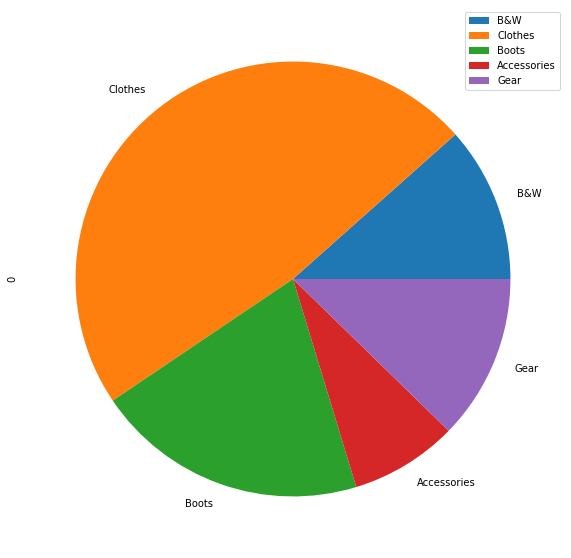

In [4]:
print('relative profit by category')
totals = ()
for name in kwd_by_cat:
    totals += df[df[name]==1]['Profit'].sum(),
pd.DataFrame(totals,index = list(kwd_by_cat.keys())).plot.pie(y=0)
print()

plots by feature and category


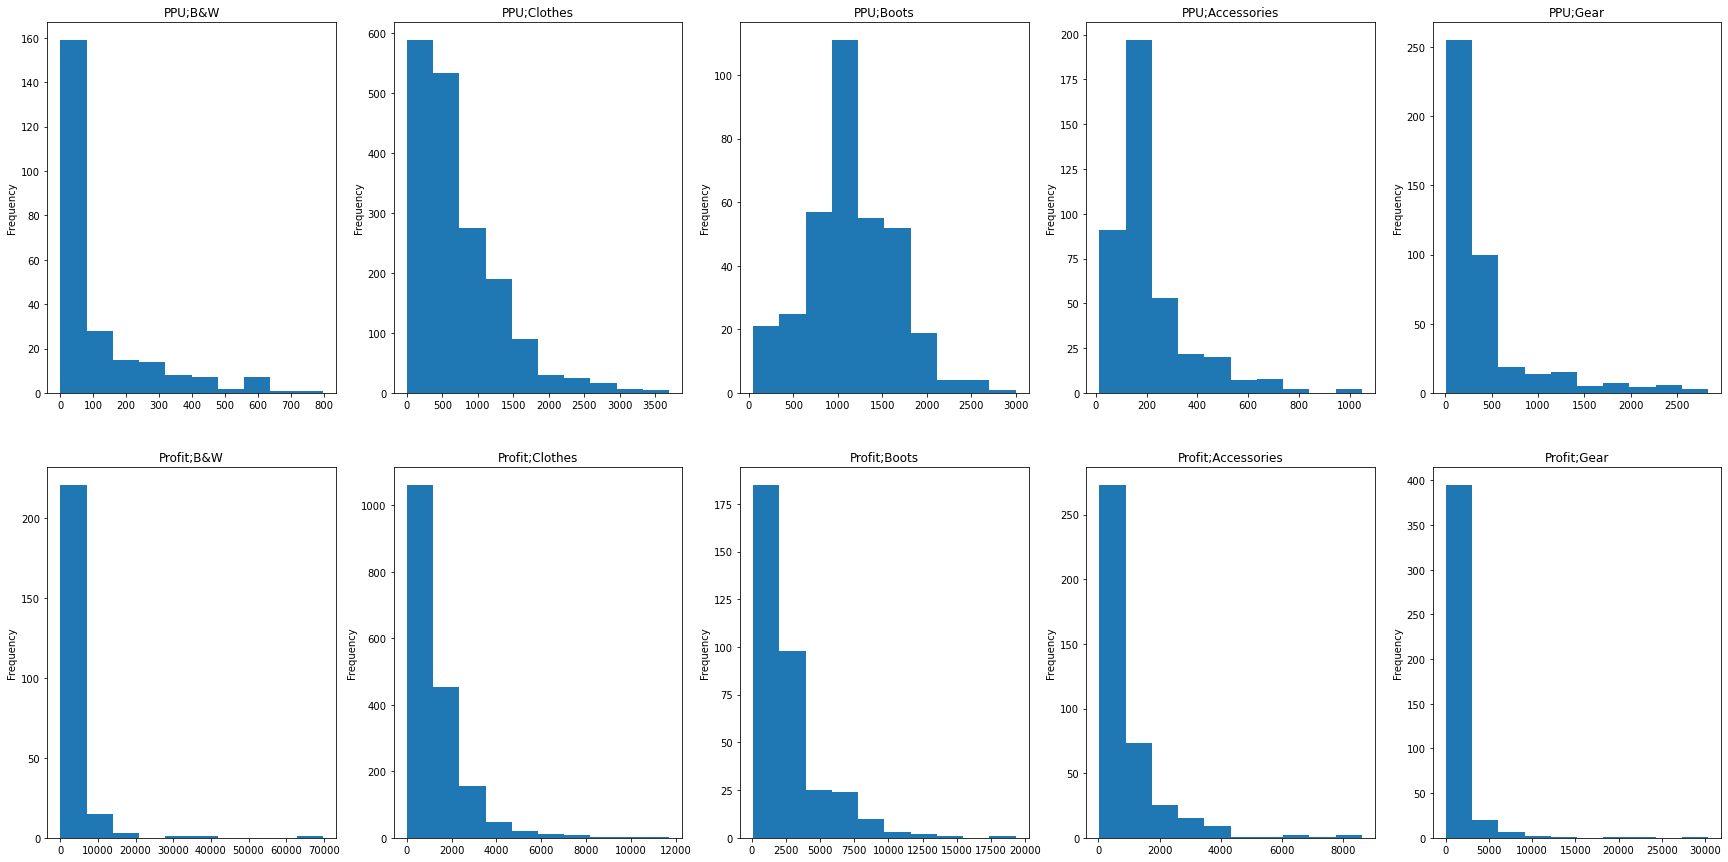

In [5]:
print('plots by feature and category')
feats = ['PPU','Profit']#,'amt']

fig, axes = plt.subplots(ncols=len(kwd_by_cat.keys()),
                         nrows=len(feats),
                         figsize=(30,15),)

for col,key in enumerate(kwd_by_cat.keys()):                         
    frame = df[df[key]==1]
    line=str(key)+': '
    for row,feat in enumerate(feats):
        frame[feat].plot.hist(ax=axes[row,col],title=str(feat)+';'+str(key))

### OLD FUNC

In [6]:
break

SyntaxError: 'break' outside loop (<ipython-input-6-6aaf1f276005>, line 4)

In [ ]:
print('split into separate DataFrames')
group = {}
for key in kwd_by_cat.keys():
    group[key] = df[df[key]==1]

group['B&W']['Profit'].mean()

In [ ]:
print('stopword filtering:')

from sklearn.feature_extraction.text import CountVectorizer
unprocessed_df = df[df['status']==0] # drop processed entries
stop = ['черн','хаки','олива','лет','бекас','форм','лес','тень','на','вдв','барс','бр', 'ка', 'track', 'для', 'мох', 'оливк', 'легион', 'оксф',
        'нато', 'payer', 'цифр', 'флора','с41', 'пвх', 'оф', 'мм', 'пол', 'горн','light', 'гр', 'см', 'саяны', 'армия', 'ут', 'смог','panzer', 'маршр' ,
        'мед', 'тр', 'мет', 'vint','тактик', 'сап', 'черный', 'трикотаж', 'арт','омон', 'комб', 'тигр', 'ст', 'bdu', 'халат', 'утепл', 'сл', 'м2', 'нерж',
        'кл', 'grey', 'monsoon', 'чёрн', 'черные', 'eco','drysole', 'камуфл', 'трен', 'трек', 'синий', 'са','russian', 'зел', 'ть', 'gsg', 'муж', 
        'acu', 'за', 'индия', 'нейлон', 'облегч','бокс', 'урбан', 'уд', 'grid', 'сп', 'пв', 'cobalt', 'полиция', 'therm', 'torvi', 'камыш','шт','выстрел', 
        'гол', 'варан', 'атакс', 'ангара', 'кв', 'winter', 'прокл','pride','обл', 'норвегия', 'пит','мвд','tundra','вст', 'dig', 'рыбацкие', 'зн', 'готовое', 'воин', 'рег', 'дж',
        'блюдо','авто','бежевые', 'бер', 'крон', 'большой','защ', 'отл', 'город', 'полот', 'вин', 'ветр', 'ввз', 'пр', 'пряж', 'wall', 'velvet', 'avalon', 'манарага', 'меш',
        'primaloft', 'double', 'мчс', 'флис', 'new','поход', 'pcu', 'polar', 'фаст', 'уфсин','микрофиб', 'hardw', 'мульт','armour', 'мод','melange', 'multi', 'циклон', 'удл', 
        'realtree', 'sas','scout', 'shell','soft', 'softshell','tibet', 'vantage','wint', 'woodl','синие', 'сер','кмф','кречет','цифра', 'песок', 'оперативн', 'bl',
        'плеч', 'пк', 'перев', 'партизан', 'паракорда','durafl', 'green' , 'laos', 'олив','plus', 'охотничьи','немезида', 'новатекс', 'ол','power', 'savanna', 'мин',]
stop = frozenset(stop)
vect = CountVectorizer(stop_words=stop)

filtering = lambda df: df[0] > df.quantile(0.5)[0]  

# process and display keyword data:
cv_fit = vect.fit_transform(unprocessed_df['name'])
frequencies = np.asarray(cv_fit.sum(axis=0))[0]

wrd_freq = pd.DataFrame(frequencies,vect.get_feature_names())
wrd_freq = wrd_freq.reset_index()

wrd_freq.loc[filtering].sort_values(0,ascending=False)

# pd.set_option('display.max_rows', df.shape[0]+1)
print(list(wrd_freq[wrd_freq['index'].str.match('(\D+)')].loc[filtering].sort_values(0,ascending=False)['index']),sep=',')
# vect.vocabulary_

In [ ]:
print('show datapoints by keyword')
line = kwd_by_cat['Boots'][1]
line = 'шевврон'
print('search word: {}'.format(line))
df[df['name'].str.contains(line)]

In [ ]:
df = clean_df.copy()
print('Feature extraction and pipeline')
'''
Try differents scaling approach
CountVectorizer parameters??
Stop words??
feature selection: nums?, 
'''

df['PPU'] = np.round(df['Profit']/df['amt'],2) # profit per unit
# df['name_old'] = df['name']
# df['name']=df['name'].str.extract('(\D+)')[0] #remove all numbers

# pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


nums = ['amt','Profit','PPU']
nums = ['PPU']

colTrans = ColumnTransformer([
    ('freq_terms',CountVectorizer(),'name'),
#     ('std',StandardScaler(),nums),
#     ('robust',RobustScaler(),nums),

])

# Features: 
X = colTrans.fit_transform(df)

print('K-means')

from sklearn.cluster import KMeans 

model = KMeans(n_clusters=5,random_state=8934) # poor accuracy, need to find optimal number of clusters

model.fit_transform(X)
df['catA'] = model.labels_

print('PCA and and unsupervised model experimantation')

from sklearn.decomposition import PCA

# n_comp = X.shape[1] # no PCA
n_comp = 30
clusters = 5

pca = PCA(n_components = n_comp)
X_reduced = pca.fit_transform(X.toarray())
evr = pca.explained_variance_ratio_

# plt.figure(figsize=(5,5))
# plt.title('pca.explained_variance_ratio_')
# plt.plot(evr)
# plt.show()


'''models tried '''
from sklearn.mixture import BayesianGaussianMixture 
from sklearn import cluster as cl

model = BayesianGaussianMixture(n_components = clusters,n_init=10) # O(kmn^2+ kn^3) -> slow;  
# model = cl.AffinityPropagation() #did not converge
# model = cl.SpectralClustering(n_clusters=15) # number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
model = cl.AgglomerativeClustering(n_clusters = clusters)
# model = cl.MeanShift()   # Slow


df['catB'] = model.fit_predict(X_reduced)

print("plotting")

groups = ['catA','catB']
feats = ['PPU','Prof %','amt']
fig, axes = plt.subplots(nrows=len(groups),
                         ncols=len(feats),
                         figsize=(10,5))
for a,c in enumerate(groups):
    for b,v in enumerate(feats):
            df.boxplot(v,c,ax=axes[a,b])
    

print('Interactive plot, bokeh')
"""
NOTES:
Fix colors?

"""
from bokeh.plotting import figure, show
import bokeh.plotting as bpl
# import bokeh.models as bmo
# from bokeh.palettes import d3
from bokeh.models.tools import HoverTool

source = bpl.ColumnDataSource(df)
hover = HoverTool(tooltips = [('name','@name'),('PPU','@PPU'),('amt','@amt') ])
p = figure(width=1800,height = 1000,tools=[hover])

# use whatever palette you want...
# palette = d3['Category10'][len(df['cat'].unique())]
# color_map = bmo.CategoricalColorMapper(factors = df['cat'].unique().astype('U'),palette=palette)

# create figure and plot
p.scatter('catA','PPU',
#           color={'field': 'cat', 'transform': color_map},
          source=source)

# bpl.show(p) 

plt.figure(figsize=(6,3))
plt.title('words by datapoint, low contrast')
plt.imshow(X.T.toarray(),cmap='binary')
plt.show()

In [ ]:
print('split into groups by category')
from sklearn.feature_extraction.text import CountVectorizer

grouped = {}
category = 'catA'
    
for i in sorted(df[category].unique()):
    vect = CountVectorizer()
    
    cv_fit = vect.fit_transform(df[df[category]==i]['name'])

    frequencies = np.asarray(cv_fit.sum(axis=0))[0]
    grouped[i] = pd.DataFrame(frequencies,vect.get_feature_names()).reset_index() 
    
#     print(grouped[i].loc[filtering].sort_values(0,ascending=False))


In [ ]:
print('Stats by category')
'''TODO:
Plotting by category
'''
# pd.set_option('display.max_rows', df.shape[0]+1)


# for i in sorted(df['cat'].unique()):
#     frame = df[df['cat']==i]
#     print(str(i).center(100))
#     print(frame)
#     frame.drop(columns=['name']).plot(title=i)